# **XGBoost `vs` Random Forest `vs` Decision Tree**

#### **Installing XGBoost:**

In [1]:
!pip install xgboost -q

#### **1. Importing Libraries / Classifier Modules:**

In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# Importing Classifier Modules
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#### **2. Loading the dataset:**

In [3]:
# import the 'diamond' dataset from Seaborn Library:
df = sns.load_dataset('diamonds')

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.shape

(53940, 10)

#### **3. Splitting the dataset into Features (X) and Target (y):**

In [6]:
# split the data into X and y
X = df.drop('cut', axis=1) # features (independent variables)
y = df['cut']  # target (dependent variable)

#### **4. Encoding the Categorical / Object Columns:**

In [7]:
# encode the input variables
le = LabelEncoder()
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# encode the target variable
y = le.fit_transform(y)

- We need to encode the categorical columns for XGBoost to work properly.

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


#### **5. Splitting the dataset into Training and Testing sets:**

In [9]:
# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### **6. Train & Predict the Model:**

#### **6.1 Train & Predict the `Decision Tree Model`:**

In [10]:
%%time
# train the decision tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# predict the test data
y_pred = dt.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7160734149054505
Precision score:  0.7160734149054505
Recall score:  0.7160734149054505
F1 score:  0.7160734149054505
CPU times: total: 1.06 s
Wall time: 1.19 s


#### **6.2 Train & Predict the `Random Forest Model`:**

In [11]:
%%time
# train the random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# predict the test data
y_pred = rf.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.7898591027067111
Precision score:  0.7898591027067111
Recall score:  0.7898591027067111
F1 score:  0.7898591027067111
CPU times: total: 28 s
Wall time: 32.7 s


#### **6.3 Train & Predict the `XGBoost Model`:**
- We need to install the XGBoost library to use the XGBoost model.
- We need to encode the categorical / object columns

In [12]:
%%time
# train the xgboost model
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# predict the test data
y_pred = xgb.predict(X_test)

print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('Precision score: ', precision_score(y_test, y_pred, average='micro'))
print('Recall score: ', recall_score(y_test, y_pred, average='micro'))
print('F1 score: ', f1_score(y_test, y_pred, average='micro'))

Accuracy score:  0.8057100482017056
Precision score:  0.8057100482017056
Recall score:  0.8057100482017056
F1 score:  0.8057100482017056
CPU times: total: 16.9 s
Wall time: 9.52 s


#### **7 Visualizing the Models:**

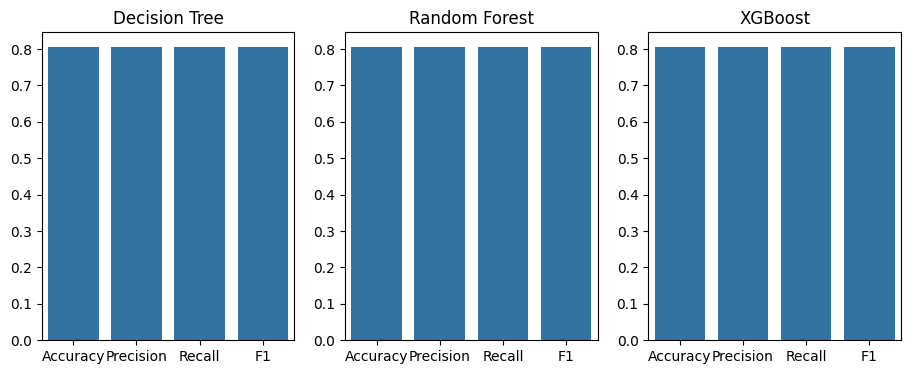

In [13]:
# make a bar plot showing each of the matrix with respect to the model
plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Decision Tree')
plt.subplot(1, 4, 2)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('Random Forest')
plt.subplot(1, 4, 3)
sns.barplot(x=['Accuracy', 'Precision', 'Recall', 'F1'], y=[accuracy_score(y_test, y_pred), precision_score(y_test, y_pred, average='micro'), recall_score(y_test, y_pred, average='micro'), f1_score(y_test, y_pred, average='micro')])
plt.title('XGBoost')
# plt.tight_layout()
plt.show()

## **Comparing the performance of the models using the following metrics:**

| Models | Accuracy Score | Precision Score | Recall Score | F1 Score | Training Time | Remarks |
| --- | --- | --- | --- | --- | --- | --- |
| Decision Tree | 0.7161 | 0.7161 | 0.7161 | 0.7161 | 1.19s | Lowest accuracy, precision, recall, and F1 score. Fastest training time. |
| Random Forest | 0.7899 | 0.7899 | 0.7899 | 0.7899 | `32.7s` | Better performance metrics than Decision Tree. Significantly longer training time. |
| XGBoost | 0.8057 | 0.8057 | 0.8057 | 0.8057 | 9.52s | Highest accuracy, precision, recall, and F1 score. Shorter training time than Random Forest. Most efficient model. |

**Summary:**
Based on the comparison, the XGBoost model performs the best in terms of both prediction performance and efficiency. It achieves the highest scores in all the performance metrics and has a relatively short training time. Therefore, if you have to choose one model, XGBoost would be the recommended choice. However, it's important to note that the performance of these models can vary depending on the data and the problem at hand. Therefore, it's always a good practice to try different models and choose the one that best fits your specific use case.